In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc9.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc10.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc1.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc2.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/208.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/212.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/215.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/202.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc2.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc45.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc50.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/211.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc44.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/carie

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
x = []
y = []

image_size = 224

labels = ['caries','without_caries']

for i in labels:
    
    folderPath = os.path.join('/kaggle/input/tooth-decay-datasetraw/teeth_dataset/Trianing',i)

    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x.append(img)
        if(i=='caries'):
            y.append(1)
        else:
            y.append(0)
        
labels = ['caries','no-caries']
for i in labels:
    folderPath = os.path.join('/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x.append(img)
        if(i=='caries'):
            y.append(1)
        else:
            y.append(0)

x = np.array(x)
y = np.array(y)

In [4]:
len(x)

288

In [5]:
x[0]

array([[[155, 100, 179],
        [153, 100, 175],
        [150,  99, 168],
        ...,
        [219, 180, 212],
        [200, 161, 194],
        [189, 149, 184]],

       [[155,  99, 180],
        [153,  99, 176],
        [150,  98, 169],
        ...,
        [209, 170, 203],
        [207, 167, 201],
        [205, 165, 201]],

       [[148,  94, 176],
        [149,  95, 174],
        [151,  99, 172],
        ...,
        [204, 165, 197],
        [213, 173, 206],
        [218, 179, 212]],

       ...,

       [[141, 156, 170],
        [143, 157, 170],
        [146, 159, 172],
        ...,
        [164, 170, 189],
        [164, 170, 189],
        [164, 170, 189]],

       [[133, 153, 169],
        [135, 154, 169],
        [138, 156, 170],
        ...,
        [168, 173, 192],
        [168, 174, 193],
        [169, 174, 193]],

       [[132, 155, 171],
        [134, 156, 172],
        [136, 157, 174],
        ...,
        [172, 176, 195],
        [172, 177, 196],
        [173, 177, 196]]

In [6]:
x.shape

(288, 224, 224, 3)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85)

In [10]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1])

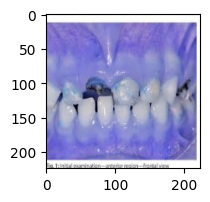

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,2))
plt.imshow(x_train[1])

In [12]:
classes = ['no-cavity','cavity']

In [13]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

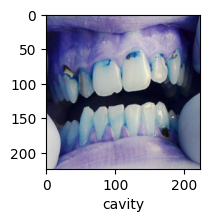

In [14]:
plot_sample(x_train,y_train,24)

In [15]:
y_train[35]

1

## Data Agumentation

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-05-23 15:44:48.479176: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 15:44:48.479301: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 15:44:48.635618: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_ds= train_datagen.flow(
        x_train, y_train, batch_size=32,
)

validation_ds = validation_datagen.flow(
        x_test, y_test, batch_size=32,)

In [18]:
len(train_ds)

8

In [19]:
len(validation_ds)

2

In [18]:
import keras
import tensorflow as tf
from tensorflow.keras import layers,models
from keras.applications import EfficientNetV2S

In [20]:
efficientnetV2S = EfficientNetV2S(
    include_top=False,
    weights="imagenet",
    classes=1000,
    classifier_activation="sigmoid",
    include_preprocessing=True,
)
model7 = models.Sequential([
    
    ## EfficientNetV2S
    efficientnetV2S,
    
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(500, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model7.compile(optimizer= 'SGD',
           loss='binary_crossentropy',
           metrics=['accuracy'])

In [22]:
history7 = model7.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1716465307.719887     107 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716465307.908793     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/8 ━━━━━━━━━━━━━━━━━━━━ 21s 22s/step - accuracy: 0.7839 - loss: 0.4161 

W0000 00:00:1716465437.259415     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.7960 - loss: 0.4007 

W0000 00:00:1716465449.073043     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


8/8 ━━━━━━━━━━━━━━━━━━━━ 320s 22s/step - accuracy: 0.8055 - loss: 0.3887 - val_accuracy: 0.9318 - val_loss: 0.2907
Epoch 2/10


W0000 00:00:1716465459.512517     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 307ms/step - accuracy: 0.9194 - loss: 0.2253 - val_accuracy: 0.9318 - val_loss: 0.3434
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 307ms/step - accuracy: 0.9444 - loss: 0.1742 - val_accuracy: 0.9091 - val_loss: 0.4913
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 306ms/step - accuracy: 0.9609 - loss: 0.1106 - val_accuracy: 0.9091 - val_loss: 0.5077
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 306ms/step - accuracy: 0.9609 - loss: 0.1209 - val_accuracy: 0.9318 - val_loss: 0.4419
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 307ms/step - accuracy: 0.9562 - loss: 0.0945 - val_accuracy: 0.9318 - val_loss: 0.3935
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 312ms/step - accuracy: 0.9514 - loss: 0.1167 - val_accuracy: 0.9318 - val_loss: 0.2840
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 310ms/step - accuracy: 0.9737 - loss: 0.0718 - val_accuracy: 0.9091 - val_loss: 0.2692
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 310ms/step - accuracy: 0.9902 - loss: 0.0670 - val_accuracy: 0.9545 - val_loss: 0.1186
Ep

In [24]:
model7.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-s (Functional)   │ (None, 7, 7, 1280)     │    20,331,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │    62,721,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,553,363 (318.73 MB)

 Trainable params: 83,399,489 (318.14 MB)

 Non-trainable params: 153,872 (601.06 KB)

 Optimizer params: 2 (12.00 B)

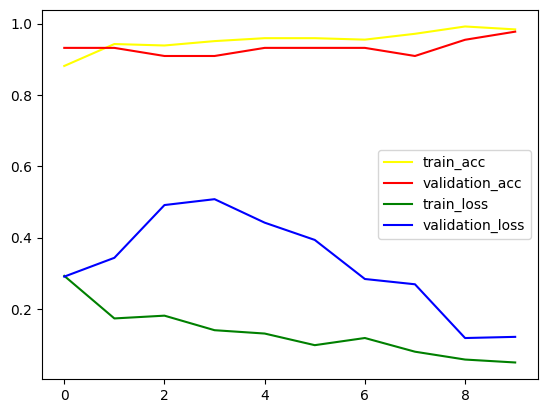

In [25]:
plt.plot(history7.history['accuracy'], color='yellow', label='train_acc')
plt.plot(history7.history['val_accuracy'], color='red', label='validation_acc')
plt.plot(history7.history['loss'], color='green', label='train_loss')
plt.plot(history7.history['val_loss'], color='blue', label='validation_loss')
plt.legend()

In [26]:
def convert_into_categorical(y):
    length=len(y)
    for i in range(length):
        y = y.astype(int)
    return y

In [28]:
y_pred_temp = model7.predict(x_test)
y_pred_temp

1/2 ━━━━━━━━━━━━━━━━━━━━ 10s 11s/step

W0000 00:00:1716465666.960206     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 23s 12s/step


W0000 00:00:1716465678.815670     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [30]:
y_pred = model7.predict(x_test)
y_pred=convert_into_categorical(y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


array([[ 0,  3],
       [ 0, 41]])

Text(70.72222222222221, 0.5, 'Actual')

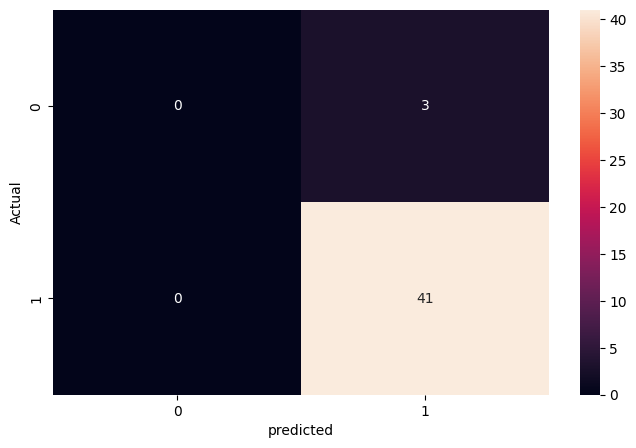

In [31]:
import seaborn as sb
plt.figure(figsize=(8,5))
sb.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Actual')

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.93      1.00      0.96        41

    accuracy                           0.93        44
   macro avg       0.47      0.50      0.48        44
weighted avg       0.87      0.93      0.90        44



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.metrics import roc_curve

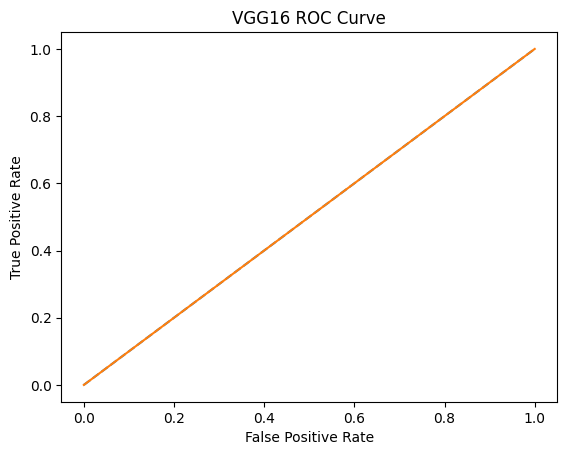

In [35]:
fpr, tpr, thresolds = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('VGG16 ROC Curve')
plt.show()